In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
import seaborn as sns
sns.set()
from tqdm import tqdm

import phenalyze as ph

from scipy.optimize import curve_fit
from scipy.special import erfcinv
from sklearn.metrics import r2_score
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks
from scipy.stats import zscore
import math

# import warnings
# warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [2]:
# plot_color_gradients('Sequential',
#                      ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'])

# Lectura de datos

In [3]:
k_r_list = np.linspace(1,3,10)
h_list = np.linspace(1,4,10)
b_list = np.linspace(1,3,10)

In [4]:
datalist = []

for h_i in h_list:
    for k_r in k_r_list:
        for b_i in b_list:
            df = pd.read_csv(f"Data_RangoParcial/Represores/RuidoIntrinseco/h{h_i:.1f}_kr{k_r:.1f}_b{b_i:.1f}.csv", header=0, index_col=0)
            df.insert(0, "h", [h_i, h_i])
            df.insert(1, "kr", [k_r, k_r])
            df.insert(2, "Beta", [b_i, b_i])
            datalist.append(df)

tint_data = pd.concat(datalist)
tint_data.columns = ['h', 'kr', 'Beta', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2', 'RNA 3', 'Protein 3']

tres_int = tint_data.loc["CV2"]
display(tres_int)

dos_int = tres_int.loc[tres_int.Beta==b_list[6]][['h', 'kr', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2']]

,h,kr,Beta,RNA 1,Protein 1,RNA 2,Protein 2,RNA 3,Protein 3
CV2,1.0,1.0,1.000000,0.229086,0.031195,0.409362,0.057629,0.133535,0.020640
CV2,1.0,1.0,1.222222,0.229043,0.031102,0.334634,0.047856,0.145640,0.022373
CV2,1.0,1.0,1.444444,0.228224,0.031516,0.281280,0.040229,0.155102,0.024087
CV2,1.0,1.0,1.666667,0.228712,0.031323,0.246263,0.035649,0.161514,0.025459
CV2,1.0,1.0,1.888889,0.229339,0.031362,0.219489,0.031856,0.172579,0.026272
...,...,...,...,...,...,...,...,...,...
CV2,4.0,3.0,2.111111,0.076049,0.010517,3.041752,0.453509,0.091686,0.012633
CV2,4.0,3.0,2.333333,0.076361,0.010506,2.786493,0.424260,0.092343,0.012744
CV2,4.0,3.0,2.555556,0.076356,0.010413,2.520399,0.387806,0.091695,0.012596
CV2,4.0,3.0,2.777778,0.076452,0.010549,2.378472,0.368614,0.091610,0.012654


In [5]:
datalist = []

for h_i in h_list:
    for k_r in k_r_list:
        for b_i in b_list:
            df = pd.read_csv(f"Data_RangoParcial/Represores/RuidoNeto/h{h_i:.1f}_kr{k_r:.1f}_b{b_i:.1f}.csv", header=0, index_col=0)
            df = df.T
            df.insert(0, "h", [h_i, h_i])
            df.insert(1, "kr", [k_r, k_r])
            df.insert(2, "Beta", [b_i, b_i])
            datalist.append(df)

tnet_data = pd.concat(datalist)
tnet_data.columns = ['h', 'kr', 'Beta', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2', 'RNA 3', 'Protein 3']

tres_net = tnet_data.loc["CV2"]
display(tres_net)

dos_net = tres_net.loc[tres_net.Beta==b_list[6]][['h', 'kr', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2']]

,h,kr,Beta,RNA 1,Protein 1,RNA 2,Protein 2,RNA 3,Protein 3
CV2,1.0,1.0,1.000000,0.283414,0.061671,0.447189,0.074917,0.180060,0.042833
CV2,1.0,1.0,1.222222,0.281887,0.060959,0.373714,0.064778,0.186623,0.043297
CV2,1.0,1.0,1.444444,0.284393,0.061859,0.323640,0.058310,0.194869,0.043655
CV2,1.0,1.0,1.666667,0.284402,0.061507,0.286085,0.052246,0.202983,0.044074
CV2,1.0,1.0,1.888889,0.283661,0.061537,0.257273,0.048421,0.210918,0.044542
...,...,...,...,...,...,...,...,...,...
CV2,4.0,3.0,2.111111,0.130701,0.040878,3.020729,0.692264,0.145842,0.043008
CV2,4.0,3.0,2.333333,0.130079,0.040083,2.779953,0.643215,0.145951,0.042752
CV2,4.0,3.0,2.555556,0.130003,0.040449,2.599977,0.632327,0.145398,0.042366
CV2,4.0,3.0,2.777778,0.129930,0.040564,2.437516,0.615039,0.145255,0.042648


In [6]:
dos_efc = dos_net.copy()
dos_efc["RNA 2"] = dos_net["RNA 2"] - dos_int["RNA 2"]
dos_efc["Protein 2"] = dos_net["Protein 2"] - dos_int["Protein 2"]

tres_efc = tres_net.copy()
tres_efc["RNA 3"] = tres_net["RNA 3"] - tres_int["RNA 3"]
tres_efc["Protein 3"] = tres_net["Protein 3"] - tres_int["Protein 3"]

# Bootstrap

In [7]:
def BootstrapFit(h_list:list, data:pd.DataFrame, model:callable, seed:list, lims:list):
    params_tensor = []
    err_tensor = []
    R2_tensor = []
    if len(data.columns)==9: #Tres Genes
        for h_i in h_list:
            new_data = data.loc[data.h==h_i]
            noise1 = new_data["Protein 1"].to_numpy()
            noise2 = new_data["Protein 2"].to_numpy()
            noise3 = new_data["Protein 3"].to_numpy()

            params_list = []
            err_list = []
            R2_list = []
            for i in tqdm(range(1000)):
                ii_random = np.random.choice(len(noise1),len(noise1))
                new_noise1 = noise1[ii_random]
                new_noise2 = noise2[ii_random]
                new_noise3 = noise3[ii_random]

                params, cov = curve_fit(f = model, xdata = [new_noise1, new_noise2], ydata = new_noise3, p0=seed[np.where(h_list==h_i)[0][0]], bounds=lims, maxfev=10000000)
                params_list.append(params)

                err = np.sqrt(2)*erfcinv(2*(1-0.95))*np.sqrt(np.diag(cov))
                err_list.append(err)

                Rsquared = r2_score(new_noise3, model([new_noise1, new_noise2], *params))
                R2_list.append(Rsquared)

            params_tensor.append(params_list)
            err_tensor.append(err_list)
            R2_tensor.append(R2_list)

    elif len(data.columns)==6: # Dos Genes
        for h_i in h_list:
            new_data = data.loc[data.h==h_i]
            noise1 = new_data["Protein 1"].to_numpy()
            noise2 = new_data["Protein 2"].to_numpy()

            params_list = []
            err_list = []
            R2_list = []
            for i in tqdm(range(1000)):
                ii_random = np.random.choice(len(noise1),len(noise1))
                new_noise1 = noise1[ii_random]
                new_noise2 = noise2[ii_random]

                params, cov = curve_fit(f = model, xdata = new_noise1 , ydata = new_noise2, p0=seed[np.where(h_list==h_i)[0][0]], bounds=lims, maxfev=10000000)
                params_list.append(params)

                err = np.sqrt(2)*erfcinv(2*(1-0.95))*np.sqrt(np.diag(cov))
                err_list.append(err)

                Rsquared = r2_score(new_noise2, model(new_noise1, *params))
                R2_list.append(Rsquared)

            params_tensor.append(params_list)
            err_tensor.append(err_list)
            R2_tensor.append(R2_list)

    else:
        print("El DataFrame de entrada no tiene la forma esperada.")

    return np.array(params_tensor), np.array(err_tensor), np.array(R2_tensor)

In [8]:
def weited_mean(x,σ2):
    w = 1/(σ2+1)
    sum_mean = np.sum(w*x)
    sum_var = np.sum(w)
    return [sum_mean/sum_var, 1/sum_var]

In [9]:
def bootstrap_filter(ParamsTensor, ErrTensor, R2Tensor):
    NewParamsTensor = []
    NewErrTensor = []
    NewR2Tensor = []

    for i in range(np.shape(R2Tensor)[0]):
        kde = gaussian_kde(R2Tensor[i])
        # x_line = np.linspace(min(R2Tensor[i]), max(R2Tensor[i]), 1000)
        x_line = np.sort(R2Tensor[i])
        x_valleys = [0] + list(find_peaks(-kde(x_line))[0])

        NewParamsTensor.append(ParamsTensor[i, R2Tensor[i]>=x_line[x_valleys[-1]], :])
        NewErrTensor.append(ErrTensor[i, R2Tensor[i]>=x_line[x_valleys[-1]], :])
        NewR2Tensor.append(R2Tensor[i, R2Tensor[i]>=x_line[x_valleys[-1]]])

    return NewParamsTensor, NewErrTensor, NewR2Tensor
    # return ParamsTensor, ErrTensor, R2Tensor



def plot_filter(R2Tensor, lines=False, curve=False, filtred_hist=True):
    fig = plt.figure(figsize=(12,6))

    for i in range(10):
        fig.add_subplot(3,4,i+1)
        kde = gaussian_kde(R2Tensor[i])

        x_line = np.linspace(min(R2Tensor[i]), max(R2Tensor[i]), 1000)
        if curve:
            plt.plot(x_line, kde(x_line))
        x_valleys = [0] + list(find_peaks(-kde(x_line))[0])

        _ = plt.hist(R2Tensor[i], density=True, bins=100, linewidth=0.0001)
        if filtred_hist:
            _ = plt.hist(R2Tensor[i][R2Tensor[i]>x_line[x_valleys[-1]]], density=True, linewidth=0.0001, alpha=0.9)
        if lines:
            [plt.axvline(xi, color="black") for xi in x_line[find_peaks(-kde(x_line))[0]]]

In [10]:
def plot_bootstrap(ParamsTensor, ErrTensor, R2Tensor, labels, dims, fig_size=(12,5), title="Figura sin título"):
    # ParamsTensor, ErrTensor, R2Tensor = bootstrap_filter(ParamsTensor,ErrTensor,R2Tensor)

    fig = plt.figure(figsize=fig_size)
    estimadores = []
    incertidumbres = []
    for i_plot in range(len(labels)):
        means_list = []
        stds_list = []
    
        ax = fig.add_subplot(dims[0], dims[1],i_plot+1)
        for i_h in range(len(h_list)):
            ii_ErrorFinito = np.isfinite(ErrTensor[i_h][:,i_plot])
            means, stds = weited_mean(ParamsTensor[i_h][:,i_plot][ii_ErrorFinito], ErrTensor[i_h][:,i_plot][ii_ErrorFinito])
            means_list.append(means)
            stds_list.append(1.96*stds)

        im = ax.scatter(np.concatenate([np.shape(ParamsTensor[j])[0]*[h_list[j]] for j in range(len(h_list))]), np.concatenate([ParamsTensor[j][:,i_plot] for j in range(len(h_list))]), c=np.concatenate([1/ErrTensor[j][:,i_plot] for j in range(len(h_list))]), s=1, cmap="viridis_r")
        plt.colorbar(im, ax=ax, label="Weight")
        
        ax.errorbar(x=h_list, y=np.array(means_list), yerr=np.array(stds_list), ecolor='black', alpha=0.5, capsize=5, fmt=" ")
    
        ax.set_ylabel(labels[i_plot])#, fontsize=15)
        ax.set_xlabel(r"$h$")#, fontsize=15)
        # plt.xticks(fontsize=15)
        # plt.yticks(fontsize=15)
        
        estimadores.append(means_list)
        incertidumbres.append(stds_list)
    plt.suptitle(title)#, fontsize=20)
    plt.tight_layout()
    # plt.savefig("GraficasParaGuardar/CORRECCIONACTPARAMS"+title.replace(' ','').replace('$','').replace('\e','e')+".png")

    return estimadores, incertidumbres


def plot_R2(ParamsTensor, ErrTensor, R2Tensor, title="Figura sin título"):
    # ParamsTensor, ErrTensor, R2Tensor = bootstrap_filter(ParamsTensor,ErrTensor,R2Tensor)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    _ = ax.boxplot(np.array(R2Tensor).T, positions=h_list.round(2), widths=0.2)
    ax.set_ylabel(r"$R^2$")
    ax.set_xlabel(r"$h$")
    ax.set_ylim(0,1.1)
    fig.suptitle(title)
    # plt.savefig("GraficasParaGuardar/CORRECCIONACTR2"+title.replace(' ','').replace('$','').replace('\e','e')+".png")

# Tres genes

### Intrínseco

In [11]:
def model(data, A, b, C, d, K):
    x, y = data
    return A*np.exp(-b*x) + C*np.exp(-d*y) + K

n_params = 5
bounds_tresint = ((n_params-1)*[-np.inf]+[0.0], n_params*[np.inf])

seeds_df = pd.read_csv("RepressorsDefinitiveSeeds.csv", index_col=0)
semilla_tresint = 10*[[eval(i) for i in seeds_df["3 genes"]["Intrinsic"].strip("][").split(" ") if i!=""]]

# ParamsTensorTresInt, ErrTensorTresInt, R2TensorTresInt = BootstrapFit(h_list, tres_int, model, semilla_tresint, bounds_tresint)
# np.savez("Bootstrap_IntrinsecoTresRepresores", params=ParamsTensorTresInt, errs=ErrTensorTresInt, R2=R2TensorTresInt)

In [12]:
bootstrap_data = np.load("Bootstrap_IntrinsecoTresRepresores.npz")
ParamsTensorTresInt, ErrTensorTresInt, R2TensorTresInt = bootstrap_data["params"], bootstrap_data["errs"], bootstrap_data["R2"]

C:\Users\aleja\AppData\Local\Temp\ipykernel_9240\628193647.py:18: RuntimeWarning: divide by zero encountered in divide
  im = ax.scatter(np.concatenate([np.shape(ParamsTensor[j])[0]*[h_list[j]] for j in range(len(h_list))]), np.concatenate([ParamsTensor[j][:,i_plot] for j in range(len(h_list))]), c=np.concatenate([1/ErrTensor[j][:,i_plot] for j in range(len(h_list))]), s=1, cmap="viridis_r")


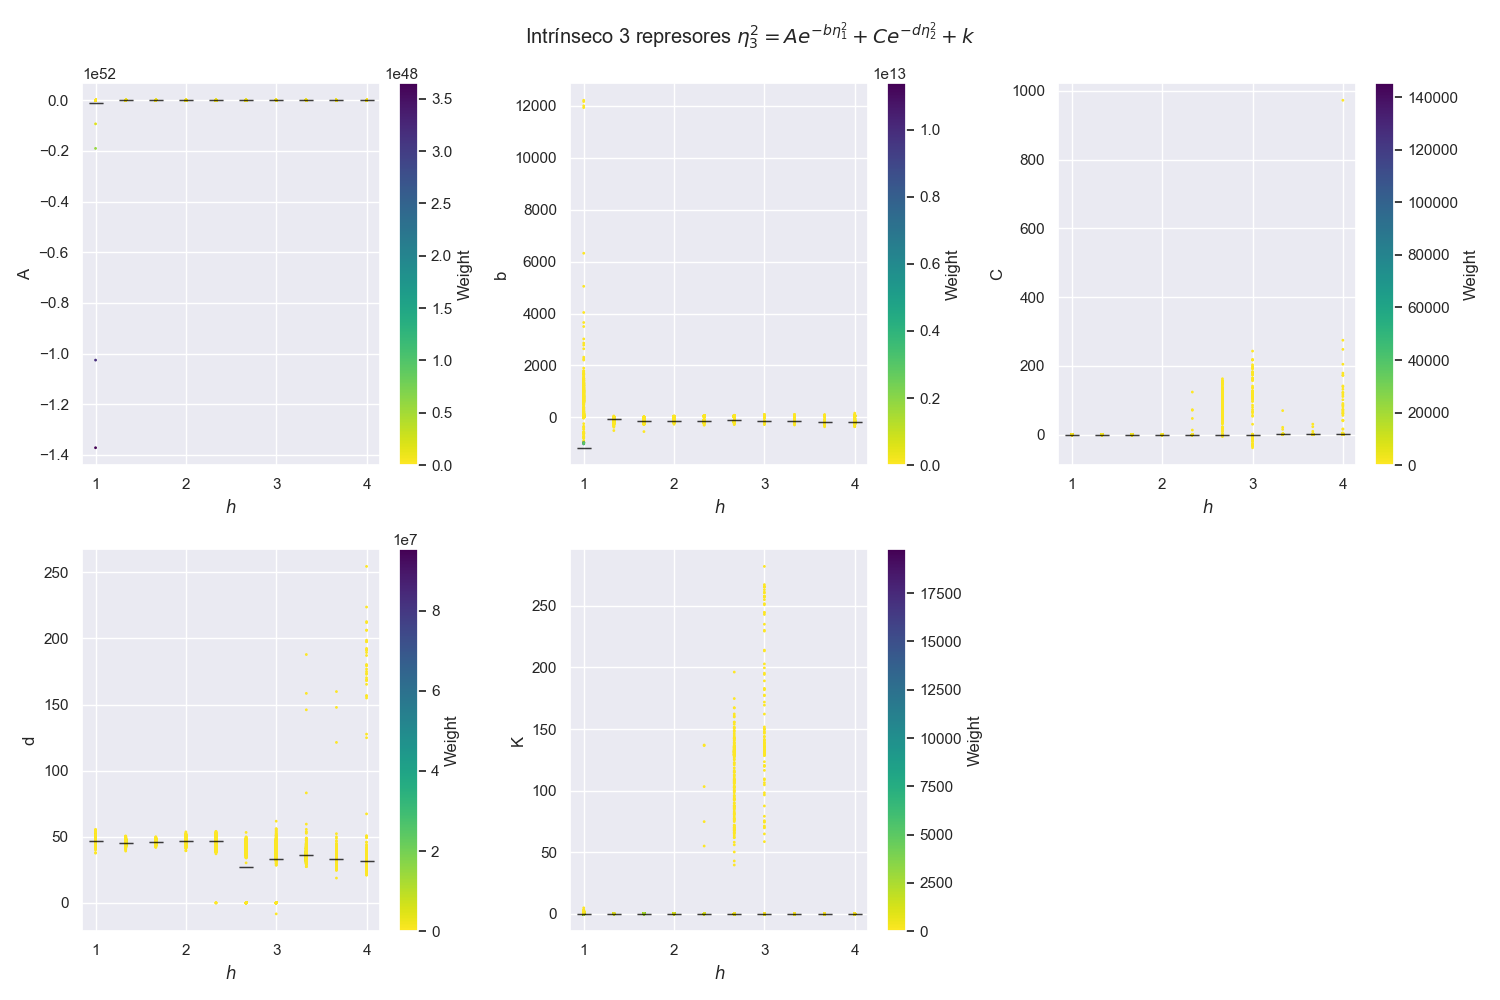

In [13]:
labels = ["A", "b", "C", "d", "K"]
EstimatorsTresInt, UncertaintiesTresInt = plot_bootstrap(ParamsTensorTresInt, ErrTensorTresInt, R2TensorTresInt, labels, (2,3), title=fr"Intrínseco 3 represores $\eta_3^2 = A e^{{-b \eta_1^2}} + C e^{{-d \eta_2^2}} + k$", fig_size=(15,10))

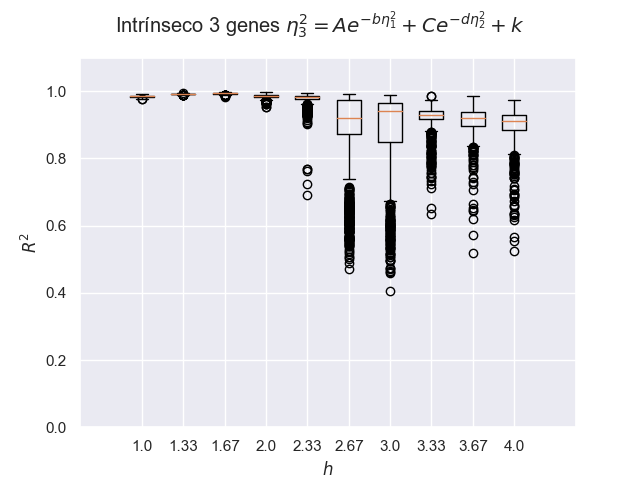

In [14]:
plot_R2(ParamsTensorTresInt, ErrTensorTresInt, R2TensorTresInt, title=fr"Intrínseco 3 genes $\eta_3^2 = A e^{{-b \eta_1^2}} + C e^{{-d \eta_2^2}} + k$")

### Global efectivo

In [15]:
def model(data, A, b, C, d, K):
    x, y = data
    return A*(x**(-b)) + C*(y**(-d)) + K

n_params = 5
bounds_tresefc = ((n_params-1)*[-np.inf]+[0.0], n_params*[np.inf])

seeds_df = pd.read_csv("RepressorsDefinitiveSeeds.csv", index_col=0)
semilla_tresefc = 10*[[eval(i) for i in seeds_df["3 genes"]["Global"].strip("][").split(" ") if i!=""]]

# ParamsTensorTresEfc, ErrTensorTresEfc, R2TensorTresEfc = BootstrapFit(h_list, tres_efc, model, semilla_tresefc, bounds_tresefc)
# np.savez("Bootstrap_GlobalTresRepresores", params=ParamsTensorTresEfc, errs=ErrTensorTresEfc, R2=R2TensorTresEfc)

In [16]:
bootstrap_data = np.load("Bootstrap_GlobalTresRepresores.npz")
ParamsTensorTresEfc, ErrTensorTresEfc, R2TensorTresEfc = bootstrap_data["params"], bootstrap_data["errs"], bootstrap_data["R2"]

C:\Users\aleja\AppData\Local\Temp\ipykernel_9240\628193647.py:18: RuntimeWarning: divide by zero encountered in divide
  im = ax.scatter(np.concatenate([np.shape(ParamsTensor[j])[0]*[h_list[j]] for j in range(len(h_list))]), np.concatenate([ParamsTensor[j][:,i_plot] for j in range(len(h_list))]), c=np.concatenate([1/ErrTensor[j][:,i_plot] for j in range(len(h_list))]), s=1, cmap="viridis_r")


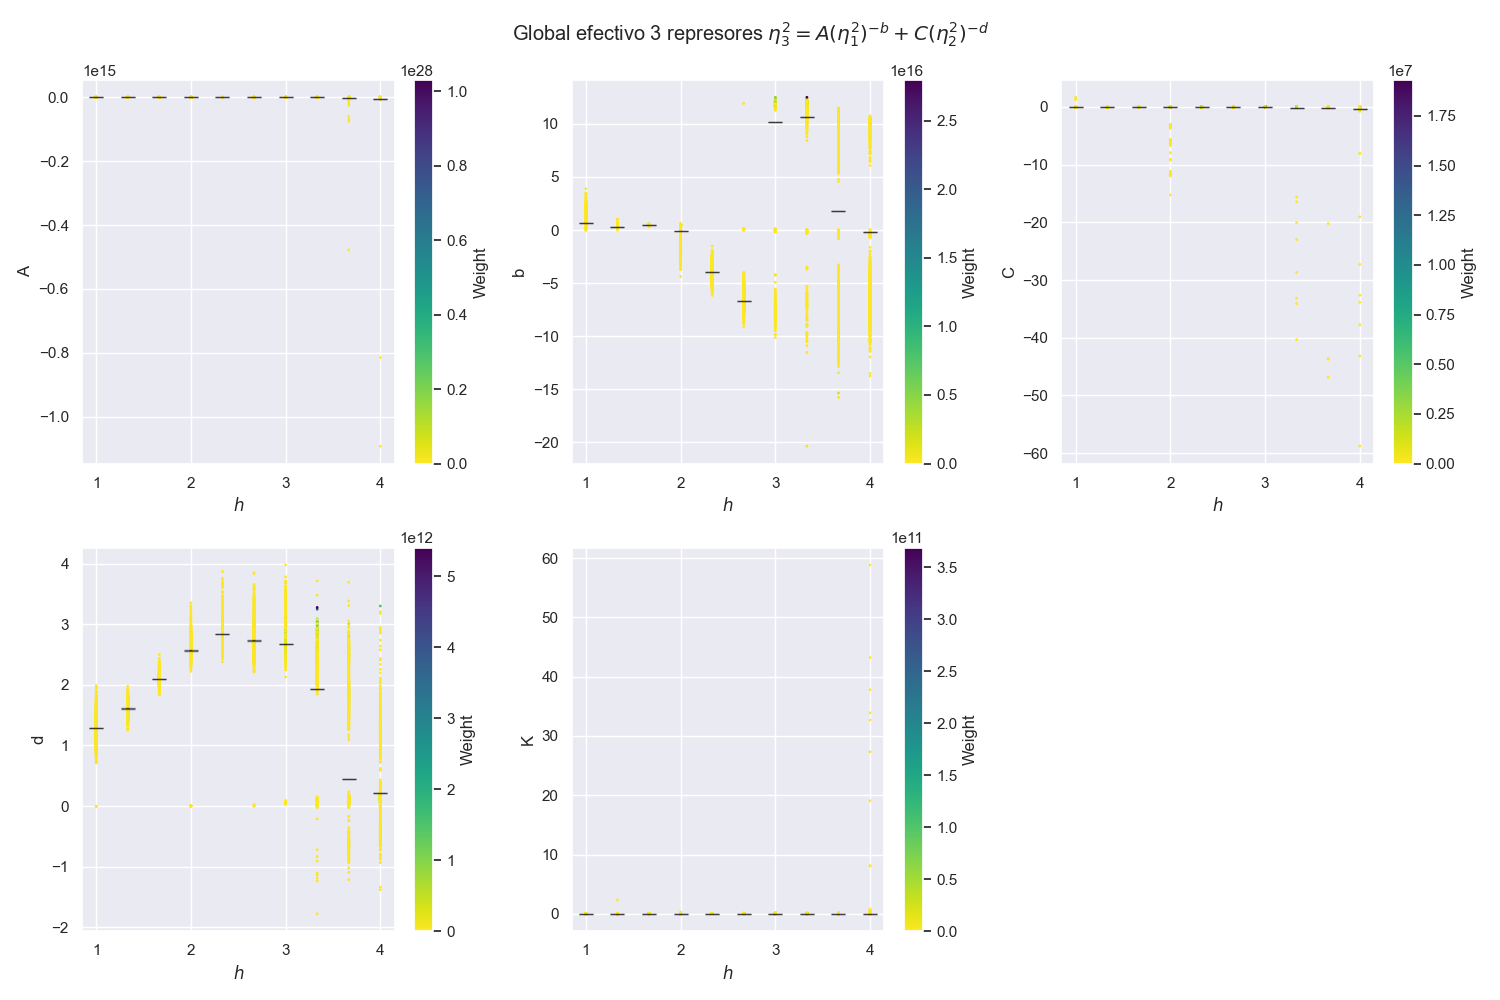

In [17]:
labels = ["A", "b", "C", "d", "K"]
EstimatorsTresEfc, UncertaintiesTresEfc = plot_bootstrap(ParamsTensorTresEfc, ErrTensorTresEfc, R2TensorTresEfc, labels, (2,3), title=fr"Global efectivo 3 represores $\eta_3^2 = A (\eta_1^2)^{{-b}} + C (\eta_2^2)^{{-d}} $", fig_size=(15,10))

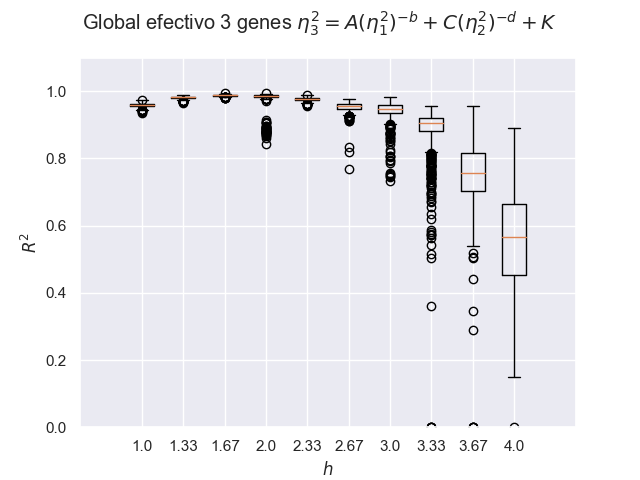

In [18]:
plot_R2(ParamsTensorTresEfc, ErrTensorTresEfc, R2TensorTresEfc, title=fr"Global efectivo 3 genes $\eta_3^2 = A (\eta_1^2)^{{-b}} + C (\eta_2^2)^{{-d}} + K$")

# Dos genes

### Intrínseco

In [19]:
def model(x, A, b, C):
    return A*np.exp(-b*x) + C

n_params = 3
bounds_dosint = ((n_params-1)*[-np.inf]+[0.0], n_params*[np.inf])

seeds_df = pd.read_csv("RepressorsDefinitiveSeeds.csv", index_col=0)
semilla_dosint = 10*[[eval(i) for i in seeds_df["2 genes"]["Intrinsic"].strip("][").split(" ") if i!=""]]

# ParamsTensorDosInt, ErrTensorDosInt, R2TensorDosInt = BootstrapFit(h_list, dos_int, model, semilla_dosint, bounds_dosint)
# np.savez("Bootstrap_IntrinsecoDosRepresores", params=ParamsTensorDosInt, errs=ErrTensorDosInt, R2=R2TensorDosInt)

In [20]:
bootstrap_data = np.load("Bootstrap_IntrinsecoDosRepresores.npz")
ParamsTensorDosInt, ErrTensorDosInt, R2TensorDosInt = bootstrap_data["params"], bootstrap_data["errs"], bootstrap_data["R2"]

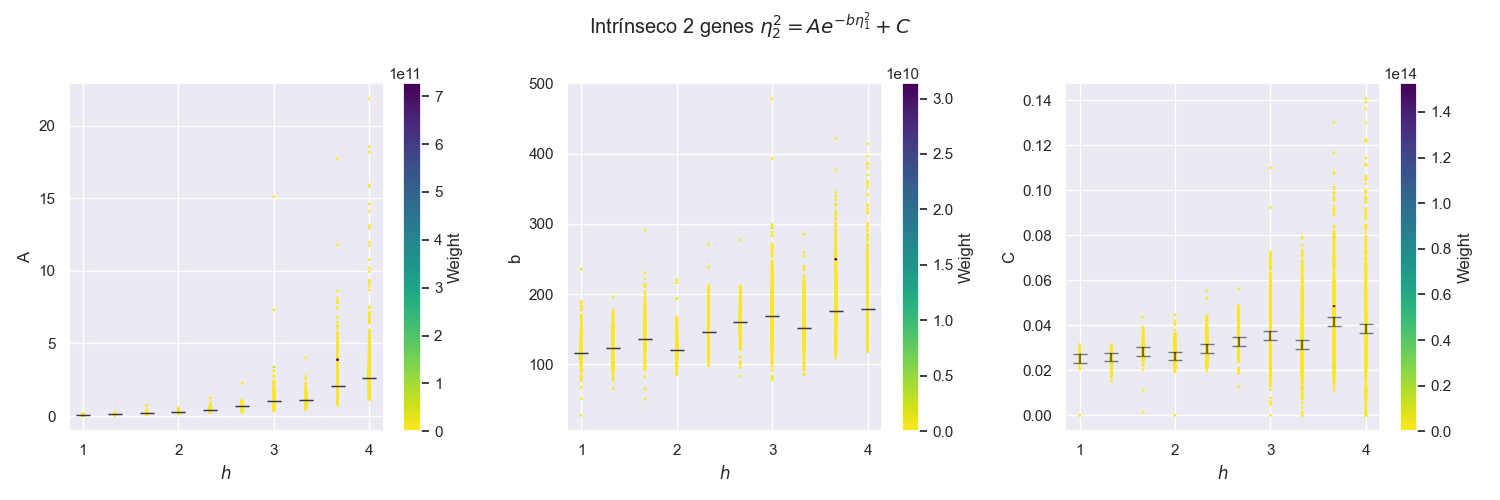

In [21]:
labels = ["A", "b", "C"]
EstimatorsDosInt, UncertaintiesDosInt = plot_bootstrap(ParamsTensorDosInt, ErrTensorDosInt, R2TensorDosInt, labels, (1,3), title=fr"Intrínseco 2 genes $\eta_2^2 = Ae^{{-b \eta_1^2}} + C$", fig_size=(15,5))

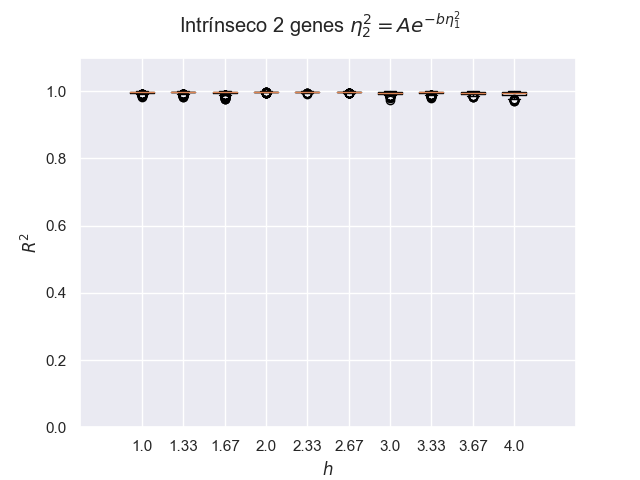

In [22]:
plot_R2(ParamsTensorDosInt, ErrTensorDosInt, R2TensorDosInt, title=fr"Intrínseco 2 genes $\eta_2^2 = Ae^{{-b \eta_1^2}}$")

### Global efectivo

In [23]:
def model(x , A, b, C):
    return A*(x**(-b)) + C

n_params = 3
bounds_dosefc = ((n_params-1)*[-np.inf]+[0.0], n_params*[np.inf])

seeds_df = pd.read_csv("RepressorsDefinitiveSeeds.csv", index_col=0)
semilla_dosefc = 10*[[eval(i) for i in seeds_df["2 genes"]["Global"].strip("][").split(" ") if i!=""]]

# ParamsTensorDosEfc, ErrTensorDosEfc, R2TensorDosEfc = BootstrapFit(h_list, dos_efc, model, semilla_dosefc, bounds_dosefc)
# np.savez("Bootstrap_GlobalDosRepresores", params=ParamsTensorDosEfc, errs=ErrTensorDosEfc, R2=R2TensorDosEfc)

In [24]:
bootstrap_data = np.load("Bootstrap_GlobalDosRepresores.npz")
ParamsTensorDosEfc, ErrTensorDosEfc, R2TensorDosEfc = bootstrap_data["params"], bootstrap_data["errs"], bootstrap_data["R2"]

C:\Users\aleja\AppData\Local\Temp\ipykernel_9240\628193647.py:18: RuntimeWarning: divide by zero encountered in divide
  im = ax.scatter(np.concatenate([np.shape(ParamsTensor[j])[0]*[h_list[j]] for j in range(len(h_list))]), np.concatenate([ParamsTensor[j][:,i_plot] for j in range(len(h_list))]), c=np.concatenate([1/ErrTensor[j][:,i_plot] for j in range(len(h_list))]), s=1, cmap="viridis_r")


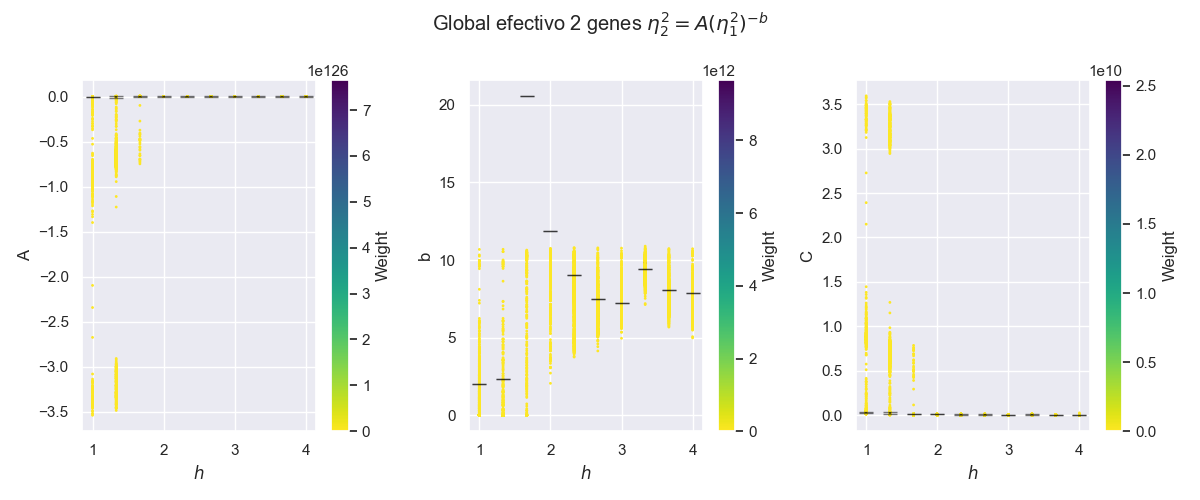

In [25]:
labels = ["A", "b", "C"]
EstimatorsDosEfc, UncertaintiesDosEfc = plot_bootstrap(ParamsTensorDosEfc, ErrTensorDosEfc, R2TensorDosEfc, labels, (1,3), title=fr"Global efectivo 2 genes $\eta_2^2 = A (\eta_1^2)^{{-b}} $")

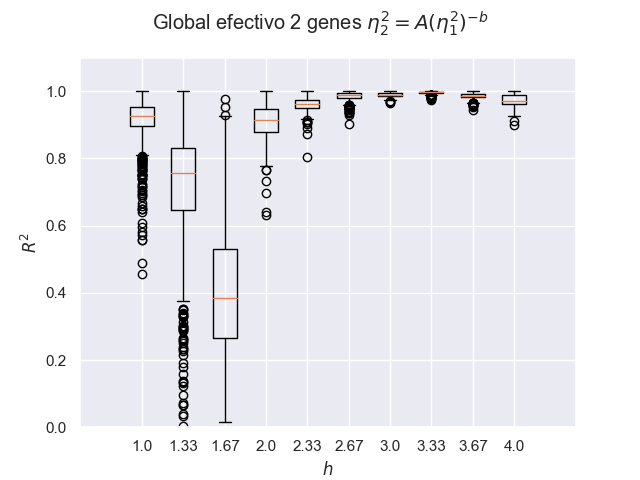

In [26]:
plot_R2(ParamsTensorDosEfc, ErrTensorDosEfc, R2TensorDosEfc, title=fr"Global efectivo 2 genes $\eta_2^2 = A (\eta_1^2)^{{-b}} $")

# Results

In [27]:
np.savez("R2_Repressors", DosInt=R2TensorDosInt, DosGlob=R2TensorDosEfc, TresInt=R2TensorTresInt, TresGlob=R2TensorTresEfc)

In [28]:
Models = ["Intrínseco 2 genes: n2 = Ae^(-b n1) + C", "Global efectivo 2 genes: n2 = A n1^(-b)", "Intrínseco 3 genes n3: = A e^(-b n1) + C e^(-d n2) + k", "Global efectivo 3 genes: n3^2 = A n1^(-b) + C n2^(-d)"]
ParamsNotation = ["A", "b", "C", "d", "K"]
Estimators = [EstimatorsDosInt, EstimatorsDosEfc, EstimatorsTresInt, EstimatorsTresEfc]
Uncertainties = [UncertaintiesDosInt, UncertaintiesDosEfc, UncertaintiesTresInt, UncertaintiesTresEfc]

for i in range(4):
    Estimators[i] = np.array(Estimators[i] + (5-len(Estimators[i]))*[10*["-"]]).T
    Uncertainties[i] = np.array(Uncertainties[i] + (5-len(Uncertainties[i]))*[10*["-"]]).T

# ReportingMatrix = [[str(Estimators[i_model][i_h][i_param])+" +/- "+str(Uncertainties[i_model][i_h][i_param]) for i_param in range(5) for i_h in range(10)] for i_model in range(4)]

ReportingMatrix = []
for i_model in range(4):
    ModelReport = []
    for i_param in range(5):
        for i_h in range(10):
            try:
                # n_round = math.ceil(-math.log10(Uncertainties[i_model][i_h][i_param].astype(float)))
                n_round = max(math.ceil(-math.log10(Uncertainties[i_model][i_h][i_param].astype(float))), math.ceil(-math.log10(abs(Estimators[i_model][i_h][i_param].astype(float)))))
                est = round(Estimators[i_model][i_h][i_param].astype(float), n_round)
                unc = round(Uncertainties[i_model][i_h][i_param].astype(float), n_round)
                ModelReport.append(str(est)+" +/- "+str(unc)) 
            except:
                ModelReport.append("--") 
    ReportingMatrix.append(ModelReport)


index = [np.repeat(ParamsNotation, 10), np.array(5*list(h_list)).round(1)]

ResultsRep = pd.DataFrame(np.array(ReportingMatrix).T, index=index)
ResultsRep.columns=Models

ResultsRep.to_csv("ParametrosRepresores.csv")

In [29]:
np.save("EstimadoresRepresores", Estimators)